In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from skgarden import RandomForestQuantileRegressor

In [2]:
samples = 1000
X = np.array([np.arange(int(samples/10)) for i in range(10)]).reshape(-1)
y = np.sin(X/10) + np.random.normal(size=len(X))
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1,1),y, test_size=0.3, shuffle=False)

In [3]:
rfqr = RandomForestQuantileRegressor(n_estimators=200, max_depth=4)
rfqr.fit(X_train, y_train)
quantiles = [0.1, 0.5, 0.9]
y_pred = rfqr.predict(X_test, quantiles=quantiles)

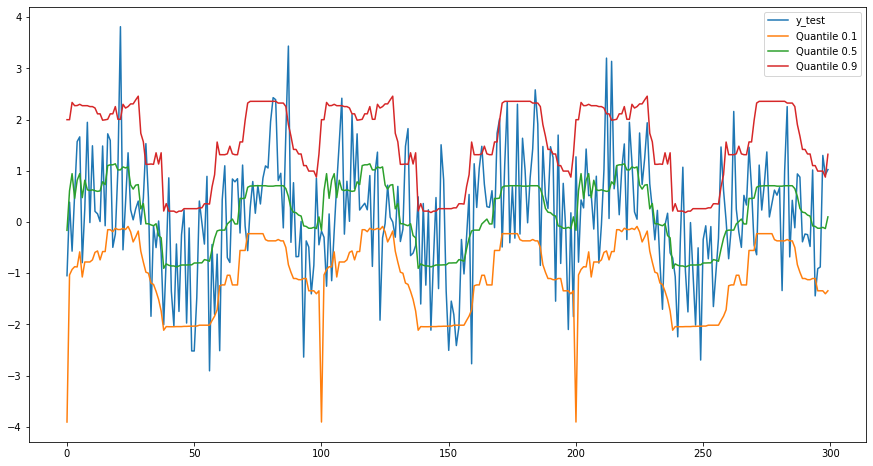

In [4]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(y_test)
ax.plot(y_pred[:,0])
ax.plot(y_pred[:,1])
ax.plot(y_pred[:,2])
ax.legend(["y_test", f"Quantile {quantiles[0]}", f"Quantile {quantiles[1]}", f"Quantile {quantiles[2]}"])